In [10]:
from glypy.io import glycoct
import extract_motif
from glypy.algorithms.subtree_search import subtree_of
import hierarchical_enrichment
import customize_motif_vec
import glycan_io
import extract_motif
import motif_class
import __init__
import json_utility
import glycan_profile
from importlib import reload
import pandas as pd
import plot_glycan_utilities
import matplotlib.pyplot as plt
from glypy.io import glycoct, iupac
import numpy as np
import clustering_analysis_pip
reload(__init__)
reload(extract_motif)
reload(motif_class)
reload(glycan_profile)
reload(plot_glycan_utilities)
%matplotlib inline


# Table relative abd

In [2]:
# abundance_data_table = json_utility.load_json("../generated_json_file/NBT_dict_name_abundance_cross_profile.json")
# load glycoprofile Mass Spectrum m/z and glycan structure info
# load CHO paper abundance table
mz_abd_table = glycan_profile.load_cho_mz_abundance()
# load glycoprofile Mass Spectrum m/z and glycan structure info
profile_mz_to_id = glycan_profile.load_glycan_profile_dic()
# normalize CHO abundance table
norm_mz_abd_dict = glycan_profile.get_norm_mz_abd_table(mz_abd_table)
# load match_dict
match_dict = json_utility.load_json(__init__.json_address + "match_dict.json")
# digitalize the glycoprofile
glycoprofile_list = glycan_profile.get_glycoprofile_list(profile_mz_to_id, norm_mz_abd_dict, match_dict)
# generate table
table_generator = glycan_profile.MotifAbdTableGenerator(glycoprofile_list)
motif_abd_table = table_generator.table_against_wt_relative_abd()

# motif_abd_table.head()
# load motif vector and return edge_list
# motif_vector = json_utility.load_json("../generated_json_file/Unicarbkb_motif_vec_12259.json")
# motif_lib = gc_glycan_motif.GlycanMotifLib(motif_dict)
motif_lib = motif_class.MotifLabNGlycan(json_utility.load_json(__init__.merged_motif_dict_addr)) # unicarbkb_motifs_12259.json
tree_type_dp, edge_list = motif_lib.motif_dependence_tree()
dropper = motif_class.NodesDropper(motif_lib, motif_class.get_weight_dict(motif_abd_table))
# hier_enrich_glycoprofile_occurence(glycoprofile, scoredMotifs_occurence_vector, np.array(edge_list),motif_vector)

mz_list 57 profile_list 37
57 37
<class 'str'>
start motif_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
Finish the n-glycan match  716  motifs are matched to the n-glycan core
start building ncore_dependence_tree
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [5]:
reload(__init__)
reload(extract_motif)
reload(motif_class)
reload(glycan_profile)
reload(plot_glycan_utilities)
reload(clustering_analysis_pip)

<module 'clustering_analysis_pip' from '/Users/apple/PycharmProjects/GlyCompare/src/clustering_analysis_pip.py'>

In [3]:
dropper = motif_class.NodesDropper(motif_lib, motif_class.get_weight_dict(motif_abd_table))

start building ncore_dependence_tree


In [1]:
import seaborn as sns
# sns.set("RdBu_r", 7)
dropper.drop_node()
print("", len(dropper.drop_node()))
df_ncore = motif_abd_table[motif_abd_table.index.isin(dropper.nodes_kept)]
# draw plot
# motif_with_n_glycan_core_all_motif(motif_, _table, weight_dict)
""" with n_glycan_core using jaccard for binary and use braycurtis for float
"""
df_ncore.to_csv(__init__.json_address + r"abundance_matrix.txt")
name_prefix = 'dropped'
# sns.palplot(sns.color_palette("RdBu_r", 7))
g = sns.clustermap(df_ncore.T, metric="braycurtis",method='single',cmap=sns.diverging_palette(247,10,99,54,1,20),linewidths=.01,figsize=(20,20),linecolor='black')
draw_profile_cluster(g, df_ncore, __init__.aaa, name_prefix, color_threshold=0.95)
cccluster_dict = draw_motif_cluster(g, df_ncore, name_prefix, color_threshold=0.23)


NameError: name 'dropper' is not defined

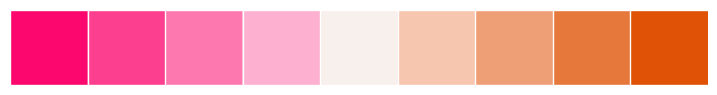

In [8]:
sns.choose_diverging_palette()

In [ ]:
247,10,99,33,1,10

In [25]:
import numpy as np
from scipy import stats
a = np.array([1,2,3,4,5,6,7,8,9,0])
a.mean()
a.var()
tt = (1-a.mean())/np.sqrt(a.var()/8)
stats.t.sf(np.abs(tt), len(a)-1)*2

0.0073143129341400812

In [28]:
from scipy.cluster import hierarchy
ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268.,400., 754., 564., 138., 219., 869., 669.])
Z = hierarchy.linkage(ytdist, 'single')

# Table Existance

In [13]:
motif_exist_table = table_generator.table_existance()
# motif_lib = motif_class.MotifLabNGlycan(json_utility.load_json(__init__.merged_motif_dict_addr)) # unicarbkb_motifs_12259.json
# tree_type_dp, edge_list = motif_lib.motif_dependence_tree()
import hierarchical_enrichment
scoredMotifs_occurence_vector=[sum(i) for i in np.array(motif_exist_table)]
method='chi_squared'
relative='child'
motif_hierarchy = np.array(edge_list)
motif_vec= motif_lib.motif_vec
hierarchical_enrichment.hier_enrich_glycoprofile_occurence(glycoprofile_list, scoredMotifs_occurence_vector, np.array(edge_list), motif_vec)


IndexError: in the future, 0-d boolean arrays will be interpreted as a valid boolean index

In [14]:
motif_hierarchy

array([[  51,   77],
       [  51,   84],
       [  51,   94],
       ..., 
       [1684, 1694],
       [1685, 1694],
       [1686, 1694]])

In [10]:
motif_exist_table

NameError: name 'motif_exist_table' is not defined